In [ ]:
#Analyse the data of a Heath App.. when does the person work-out, how many steps he took on daily basis, what are his active times etc.
#Advance Analytics have better visualisation in form of graphs.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

# Load Excel dataset into DataFrame
excel_file_path = '/content/HealthApp_2k.log_structured.csv'
df = pd.read_csv(excel_file_path)

# Display the first few rows of the DataFrame
print(df.head())

   LineId                   Time                 Component       Pid  \
0       1  20171223-22:15:29:606                  Step_LSC  30002312   
1       2  20171223-22:15:29:615                  Step_LSC  30002312   
2       3  20171223-22:15:29:633  Step_StandReportReceiver  30002312   
3       4  20171223-22:15:29:635                  Step_LSC  30002312   
4       5  20171223-22:15:29:635     Step_StandStepCounter  30002312   

                                             Content EventId  \
0                            onStandStepChanged 3579     E42   
1                      onExtend:1514038530000 14 0 4     E39   
2  onReceive action: android.intent.action.SCREEN_ON     E41   
3  processHandleBroadcastAction action:android.in...     E43   
4                                  flush sensor data     E12   

                                       EventTemplate  
0                             onStandStepChanged <*>  
1                           onExtend:<*> <*> <*> <*>  
2  onReceive acti

In [ ]:
# Drop three columns
columns_to_drop = ['Pid','LineId','EventId','EventTemplate']
df = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping the columns
print(df.head())



                    Time                 Component  \
0  20171223-22:15:29:606                  Step_LSC   
1  20171223-22:15:29:615                  Step_LSC   
2  20171223-22:15:29:633  Step_StandReportReceiver   
3  20171223-22:15:29:635                  Step_LSC   
4  20171223-22:15:29:635     Step_StandStepCounter   

                                             Content  
0                            onStandStepChanged 3579  
1                      onExtend:1514038530000 14 0 4  
2  onReceive action: android.intent.action.SCREEN_ON  
3  processHandleBroadcastAction action:android.in...  
4                                  flush sensor data  


In [ ]:
# Convert 'time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')

# Extract time in the format of hour:minute:second
df['Timestamp'] = df['Time'].dt.strftime('%H:%M')

# Display the DataFrame with the new 'FormattedTime' column
print(df[['Time', 'Timestamp']])

                        Time Timestamp
0    2017-12-23 22:15:29.606     22:15
1    2017-12-23 22:15:29.615     22:15
2    2017-12-23 22:15:29.633     22:15
3    2017-12-23 22:15:29.635     22:15
4    2017-12-23 22:15:29.635     22:15
...                      ...       ...
1995 2017-12-24 00:58:53.985     00:58
1996 2017-12-24 00:59:07.581     00:59
1997 2017-12-24 01:00:00.794     01:00
1998 2017-12-24 01:01:00.935     01:01
1999 2017-12-24 01:02:35.789     01:02

[2000 rows x 2 columns]


In [ ]:
# Extract date, day, and hour from the 'time' column
df['date'] = df['Time'].dt.date
df['day'] = df['Time'].dt.day_name()
df['hour'] = df['Time'].dt.hour
# Display the first few rows of the DataFrame
print(df.head())

                     Time                 Component  \
0 2017-12-23 22:15:29.606                  Step_LSC   
1 2017-12-23 22:15:29.615                  Step_LSC   
2 2017-12-23 22:15:29.633  Step_StandReportReceiver   
3 2017-12-23 22:15:29.635                  Step_LSC   
4 2017-12-23 22:15:29.635     Step_StandStepCounter   

                                             Content Timestamp        date  \
0                            onStandStepChanged 3579     22:15  2017-12-23   
1                      onExtend:1514038530000 14 0 4     22:15  2017-12-23   
2  onReceive action: android.intent.action.SCREEN_ON     22:15  2017-12-23   
3  processHandleBroadcastAction action:android.in...     22:15  2017-12-23   
4                                  flush sensor data     22:15  2017-12-23   

        day  hour  
0  Saturday    22  
1  Saturday    22  
2  Saturday    22  
3  Saturday    22  
4  Saturday    22  


In [ ]:
# Extract numeric values from the 'Content' column and create a new column 'Steps'
def extract_numeric(s):
    numeric_values = re.findall(r'\d+', str(s))
    return sum(map(int, numeric_values))

df['Steps'] = df['Content'].apply(extract_numeric)

# the hourly steps
hourly_data = df.groupby('hour').agg({'Steps': 'sum'}).reset_index()

# Display the cleaned and aggregated dataset
print(hourly_data)

   hour            Steps
0     0  119611197655656
1     1                0
2    22  867044980291121
3    23  334607927078503


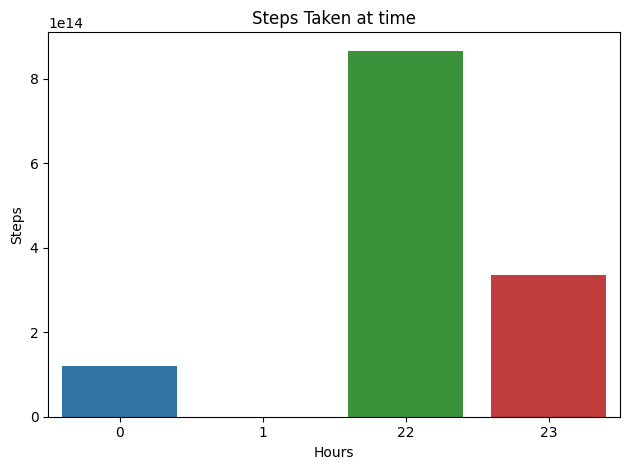

In [ ]:
# Identify active hours
sns.barplot(x=hourly_data['hour'], y=hourly_data['Steps'])
plt.title('Steps Taken at time')
plt.xlabel('Hours')
plt.ylabel('Steps')

plt.tight_layout()
plt.show()

In [ ]:
# Basic analytics
# Daily steps
daily_steps = df.groupby('date')['Steps'].sum().reset_index()
print(daily_steps)

# Workout times
workout_times = df.groupby('Component')['Steps'].sum()
print(workout_times)

         date             Steps
0  2017-12-23  1201652907369624
1  2017-12-24   119611197655656
Component
HiH_                                         0
HiH_DataStatManager            149382344906264
HiH_HiAppUtil                                0
HiH_HiBroadcastUtil                          0
HiH_HiHealthBinder                       40175
HiH_HiHealthDataInsertStore      9083750640179
HiH_HiSyncControl                     40443486
HiH_HiSyncUtil                               2
HiH_ListenerManager                          2
Step_DataCache                               0
Step_ExtSDM                           28181949
Step_FlushableStepDataCache          176738376
Step_HGNH                                 7214
Step_LSC                       420903332526262
Step_NotificationUtil                        0
Step_SPUtils                   738866319706810
Step_ScreenUtil                              0
Step_StandReportReceiver              22226550
Step_StandStepCounter                        0
S

<Figure size 1200x600 with 0 Axes>

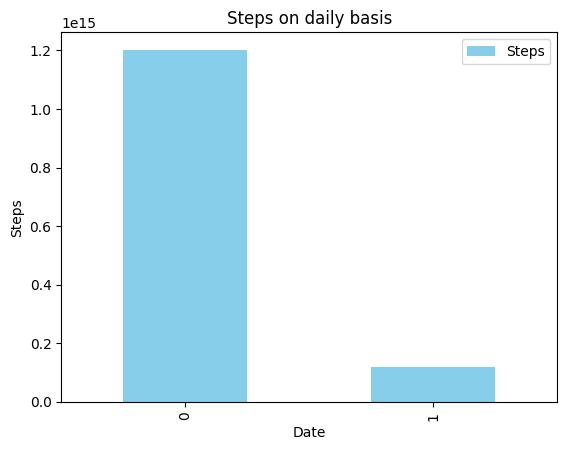

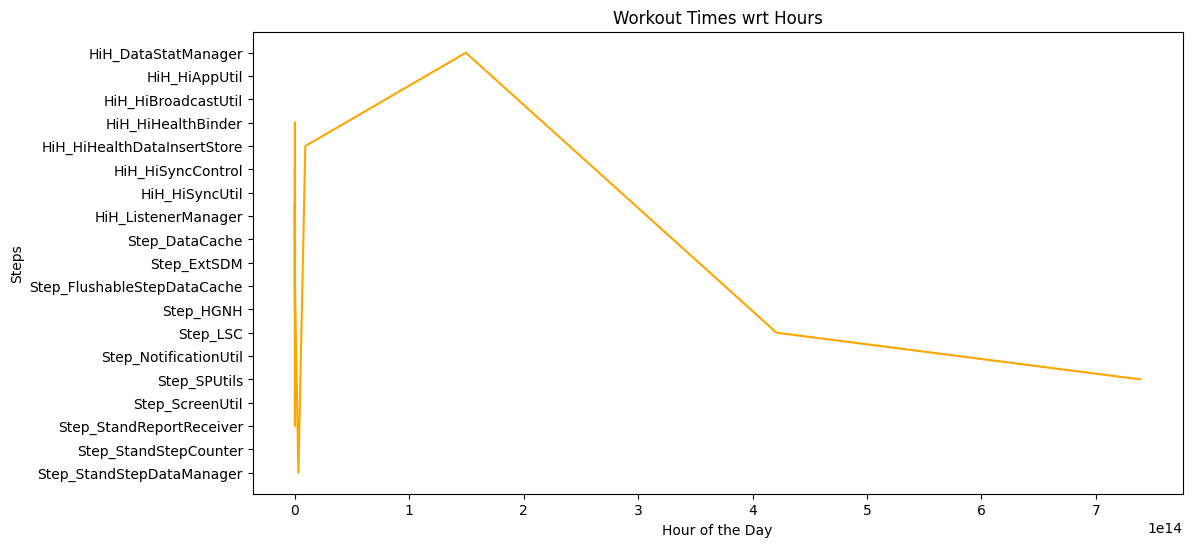

In [ ]:
# Visualization
# Daily steps Barplot
plt.figure(figsize=(12, 6))
daily_steps.plot(kind='bar', color='skyblue')
plt.title('Steps on daily basis')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.show()

# Active times Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(y=workout_times.index, x=workout_times.values, color='orange')
plt.title('Workout Times wrt Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Steps')
plt.show()

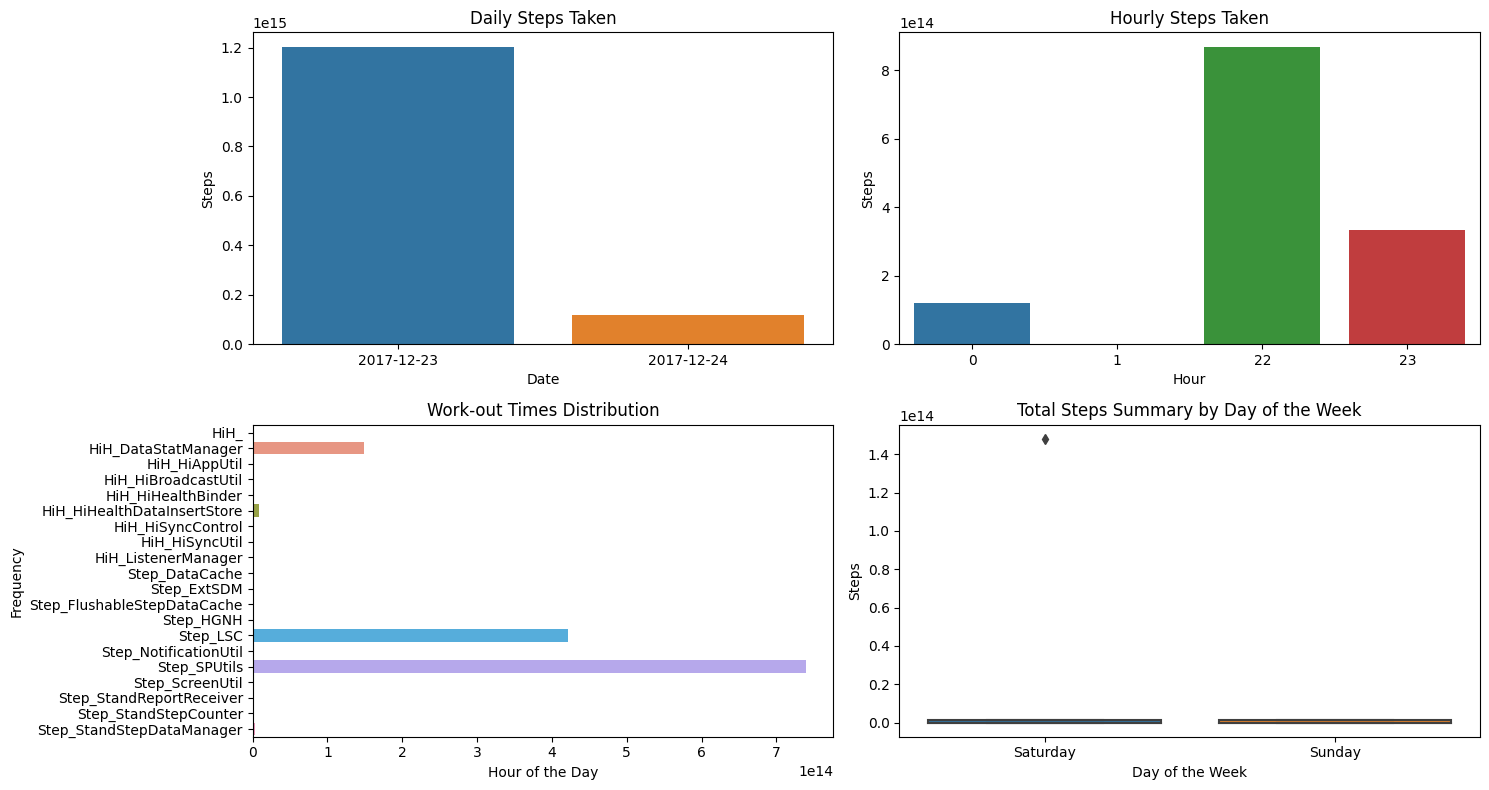

In [ ]:
# Visualization
plt.figure(figsize=(15, 8))

# Plot daily steps
plt.subplot(2, 2, 1)
sns.barplot(x=daily_steps['date'], y=daily_steps['Steps'])
plt.title('Daily Steps Taken')
plt.xlabel('Date')
plt.ylabel('Steps')

# Plot hourly steps
plt.subplot(2, 2, 2)
sns.barplot(x=hourly_data['hour'], y=hourly_data['Steps'])
plt.title('Hourly Steps Taken')
plt.xlabel('Hour')
plt.ylabel('Steps')

# Work-out Times Distribution
plt.subplot(2, 2, 3)
sns.barplot(y=workout_times.index, x=workout_times.values)
plt.title('Work-out Times Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

# Total Steps Summary
plt.subplot(2, 2, 4)
sns.boxplot(x='day', y='Steps', data=df)
plt.title('Total Steps Summary by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Steps')

plt.tight_layout()
plt.show()


<ipython-input-103-924e93974f20>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


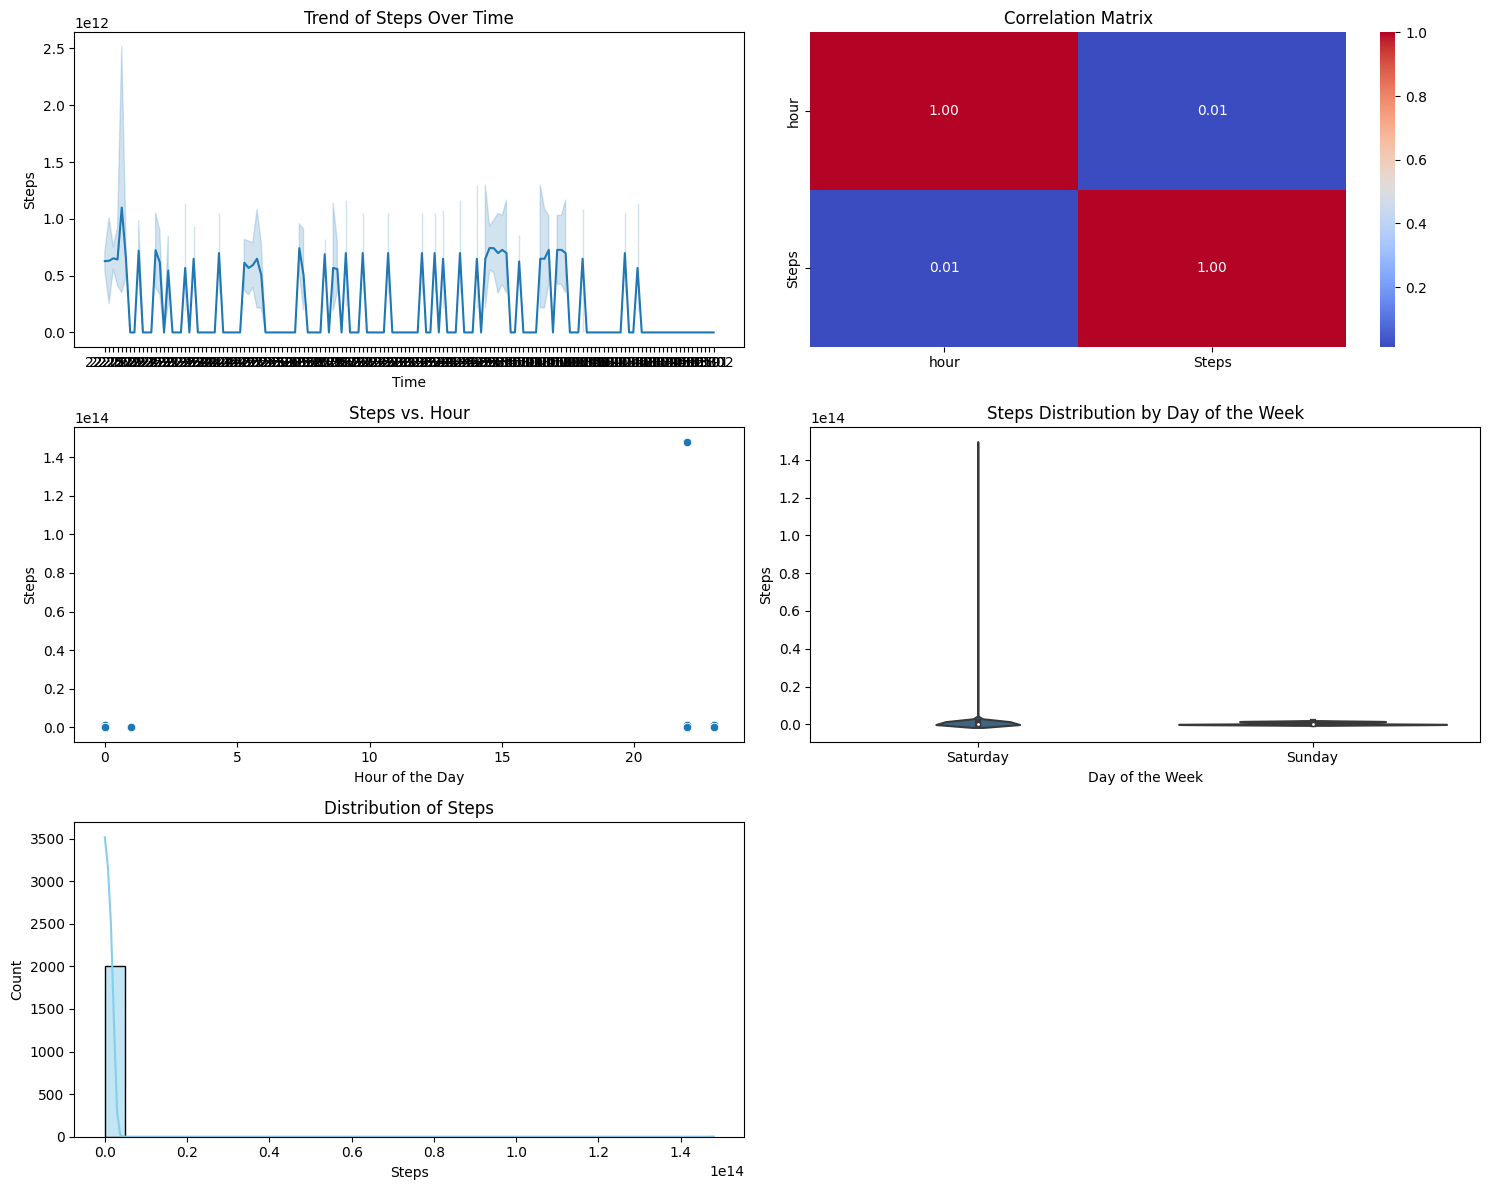

In [ ]:
# Advanced Analytics
plt.figure(figsize=(15, 12))

# Trend of Steps over Time(A line plot showing the trend of steps over time.)
plt.subplot(3, 2, 1)
sns.lineplot(x='Timestamp', y='Steps', data=df)
plt.title('Trend of Steps Over Time')
plt.xlabel('Time')
plt.ylabel('Steps')

# Correlation Matrix
#A heatmap displaying the correlation matrix between numeric variables.
correlation_matrix = df.corr()
plt.subplot(3, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

# Scatterplot - Steps vs. Hour
# the relationship between steps and the hour of the day.
plt.subplot(3, 2, 3)
sns.scatterplot(x='hour', y='Steps', data=df)
plt.title('Steps vs. Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Steps')

# Violin Plot - Steps by Day of the Week
#showing the distribution of steps for Both days.
plt.subplot(3, 2, 4)
sns.violinplot(x='day', y='Steps', data=df, palette='viridis')
plt.title('Steps Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Steps')

# Distribution of Steps
#A histogram and kernel density estimate of the distribution of steps.
plt.subplot(3, 2, 5)
sns.histplot(df['Steps'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Steps')
plt.xlabel('Steps')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (20) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (20) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


Text(0.5, 1.02, 'Pairplot for Steps, Hour, and Component')

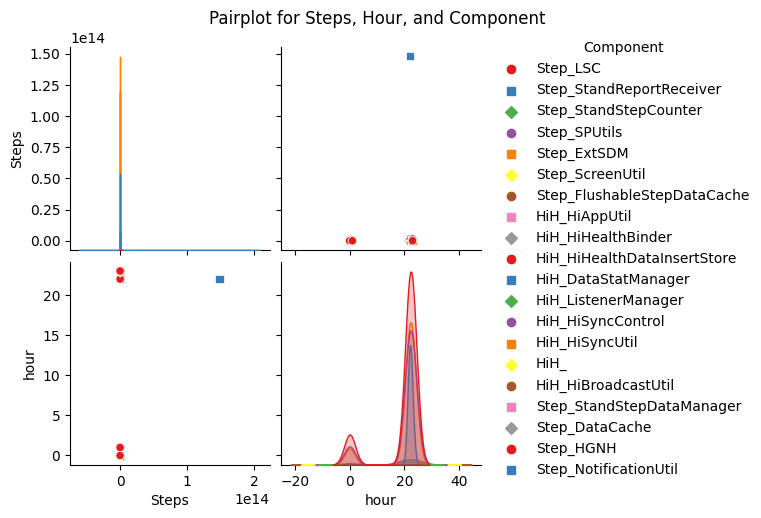

In [ ]:
# Pairplot for selected variables
selected_vars = ['Steps', 'hour', 'Component']
sns.pairplot(df[selected_vars], hue='Component', palette='Set1', markers=["o", "s", "D"])
plt.suptitle('Pairplot for Steps, Hour, and Component', y=1.02)
# To show relationships between selected variables.